<a href="https://colab.research.google.com/github/Aarohi-jain84/Chemical-Process-Optimization/blob/main/chemical_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
   Temperature  Pressure  Concentration_A  Concentration_B  Catalyst  \
0    87.454012  7.283455         0.266620         0.567174  0.033554   
1   145.071431  5.824867         0.587711         0.531264  0.032228   
2   123.199394  3.785749         0.885651         0.123078  0.091563   
3   109.865848  8.324155         0.759002         0.407123  0.032459   
4    65.601864  7.162581         0.825905         0.442176  0.034475   

   Reaction_Time       Yield  
0     101.027081   92.445576  
1      94.098057  100.000000  
2      73.088185  100.000000  
3     115.165186  100.000000  
4      32.052197  100.000000  

Summary statistics:
       Temperature    Pressure  Concentration_A  Concentration_B    Catalyst  \
count   500.000000  500.000000       500.000000       500.000000  500.000000   
mean     99.856171    5.337563         0.565802         0.546829    0.054986   
std      29.868841    2.569441         0.267474         0.258309    0.025723   
min      50.506

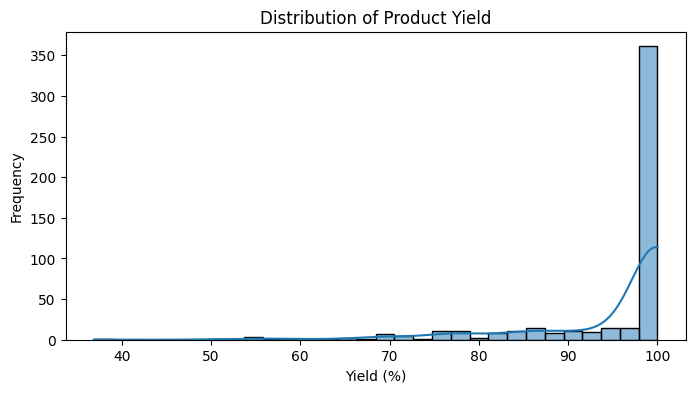

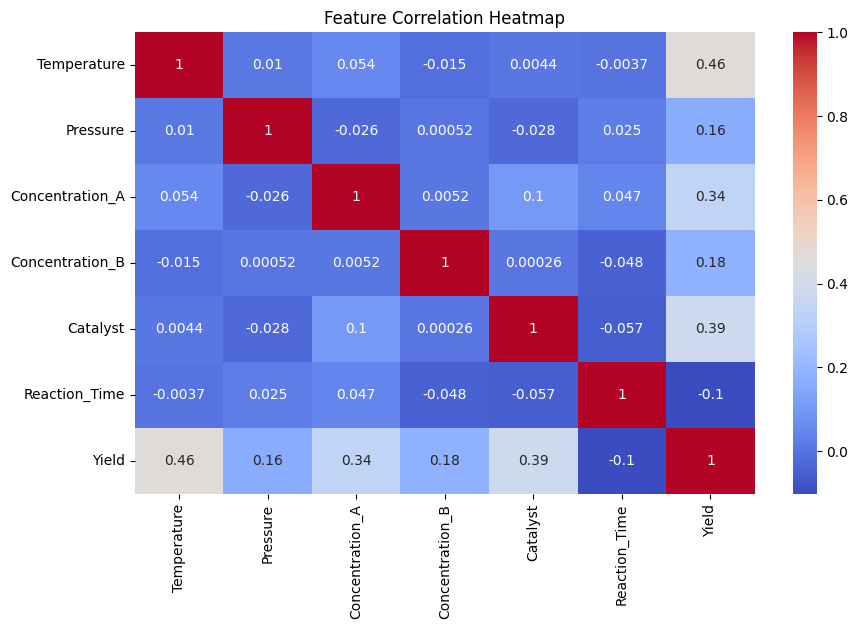

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('chemical_process_data.csv')

# Show first 5 rows
print("First 5 rows of dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize distribution of output (Yield)
plt.figure(figsize=(8,4))
sns.histplot(data['Yield'], bins=30, kde=True)
plt.title('Distribution of Product Yield')
plt.xlabel('Yield (%)')
plt.ylabel('Frequency')
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split features and target
X = data.drop('Yield', axis=1)
y = data['Yield']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


Linear Regression Performance:
RMSE: 5.167
R^2 Score: 0.535


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R^2 Score: {r2_rf:.3f}")


Random Forest Regression Performance:
RMSE: 4.605
R^2 Score: 0.631


In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    verbose=1
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on test data
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best**0.5
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest Performance:")
print(f"RMSE: {rmse_best:.3f}")
print(f"R^2 Score: {r2_best:.3f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Performance:
RMSE: 4.580
R^2 Score: 0.635


<ipython-input-7-930bec23f355>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


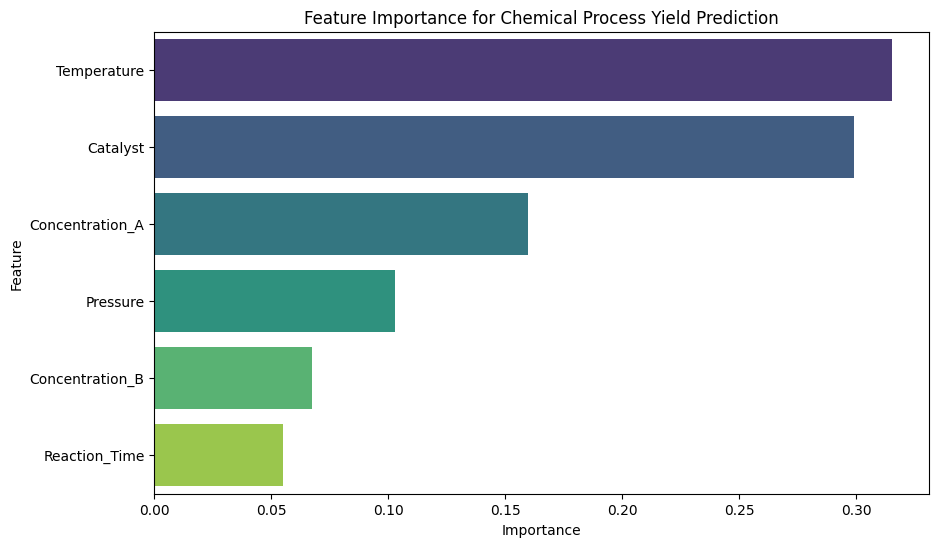

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest model
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance for Chemical Process Yield Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
